In [1]:
#import modules and set up environment 
import os
import sys
path = "../../src/"

sys.path.append(path)
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('tableau-colorblind10')
plt.style.use('seaborn-colorblind')
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

### Importing csv files

In [2]:
methods = ["sgld", "sgldps", "sgldcv", "sgldcvps"]
ksd = dict()

for i in range(len(methods)):
    method = methods[i]
    items = glob.glob(f"./out/ksdcover_{method}.csv")[0]
    ksd[method] = pd.read_csv(items)

In [3]:
ll = dict()

for i in range(len(methods)):
    method = methods[i]
    items = glob.glob(f"./out/llcover_{method}.csv")[0]
    ll[method] = pd.read_csv(items)

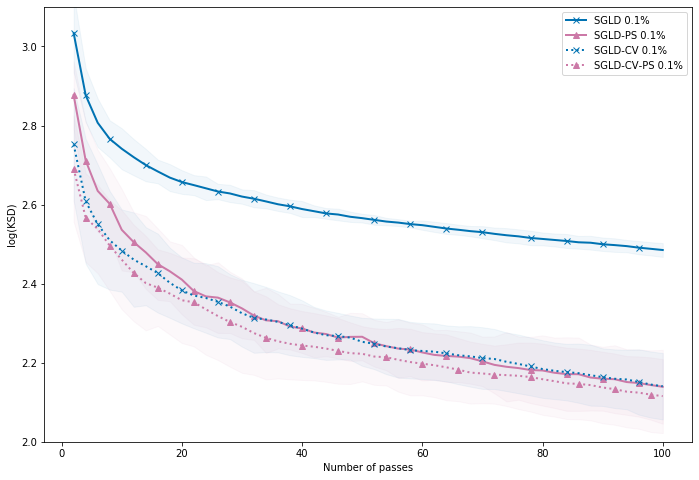

In [4]:
plot_methods = ["sgld", "sgldps", "sgldcv", "sgldcvps"]
labs = ["SGLD 0.1%", "SGLD-PS 0.1%", "SGLD-CV 0.1%", "SGLD-CV-PS 0.1%"] 
lines = ["-","-", "dotted", "dotted"]
markers = ["x", "^"]*2
col_idx = [0, 3]*2

sgld_batches = 0.01
samples_csv = dict()
Niter = 10**4
idx_sgld =np.arange(10000, 0, -np.int64(2/sgld_batches))[::-1]-1

fig, ax = plt.subplots(figsize=(12,8))
plt.gcf().subplots_adjust(left=0.15)


for i in range(0,4):
    plot_data = []
    method = plot_methods[i]
    plot_data.append((idx_sgld+1)*0.01)
    smooth_path    = ksd[method].mean(axis=1)
    plot_data.append(smooth_path)
    path_deviation = 2*ksd[method].std(axis=1)
    under_line     = (smooth_path-path_deviation)
    plot_data.append(under_line)
    over_line      = (smooth_path+path_deviation)
    plot_data.append(over_line) 
    dat = np.array(pd.DataFrame(plot_data).T)
    ax.plot(dat[:,0], dat[:, 1], linestyle = lines[i], label=labs[i], c = colors[col_idx[i]], marker=markers[i], markevery=0.05, linewidth=2)
    ax.fill_between(dat[:,0], dat[:, 2], dat[:, 3], color = colors[col_idx[i]],alpha=.05)

# plt.yscale("log")
#plt.xscale("log")  
plt.xlabel("Number of passes")
plt.ylabel("log(KSD)")
plt.ylim(2.0,3.1)
plt.legend()
plt.savefig("./fig/lrb_ksd.pdf")
plt.show()

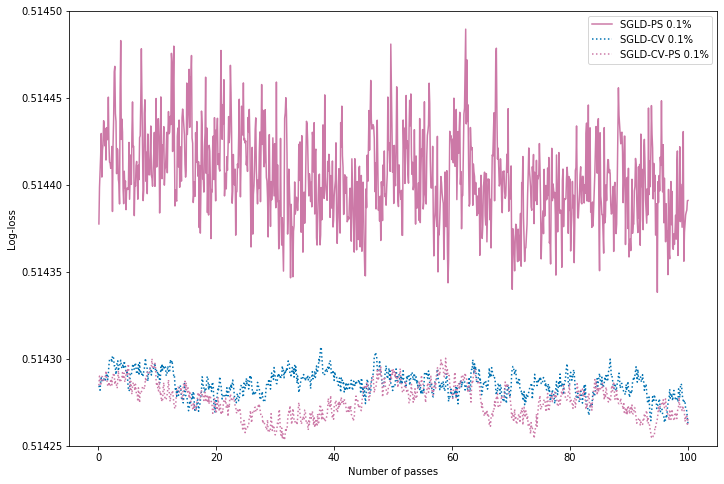

In [5]:
plot_methods = ["sgld", "sgldps", "sgldcv", "sgldcvps"]
labs = ["SGLD 0.1%", "SGLD-PS 0.1%", "SGLD-CV 0.1%", "SGLD-CV-PS 0.1%"] 
lines = ["-","-", "dotted", "dotted"]
markers = ["x", "^"]*2
col_idx = [0, 3]*2

fig, ax = plt.subplots(figsize=(12,8))
plt.gcf().subplots_adjust(left=0.15)
idx_ll=np.arange(Niter, 0, -10)[::-1]-1

for i in range(1,4):
    plot_data = []
    method = plot_methods[i]
    plot_data.append((idx_ll+1)*0.01)
    smooth_path    = ll[method].mean(axis=1)
    plot_data.append(smooth_path)
    dat = np.array(pd.DataFrame(plot_data).T)
    ax.plot(dat[:,0], dat[:, 1], linestyle = lines[i],label=labs[i], c = colors[col_idx[i]],linewidth=1.5)

plt.xlabel("Number of passes")
plt.ylabel("Log-loss")
plt.ylim(0.51425,0.5145)
plt.legend()
plt.savefig("./fig/lrb_ll.pdf")
plt.show()